<div style="background-color:#5D73F2; color:#19180F; font-size:40px; font-family:Verdana; padding:10px; border: 5px solid #19180F; border-radius:10px"> BART </div>
<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Verdana; padding:10px; border: 5px solid #19180F; border-radius:10px"> Architecture Overview</div>
<div style="background-color:#D5D9F2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F; border-radius:10px">
    
- Input Sequence: This represents the input text or sequence that BART receives.<br><br>
- Encoder: The encoder component analyses the input sequence and extracts contextual representations from it. It is made up of several layers, each of which has a self-attention mechanism and a feed-forward network. BART's encoder is bidirectional, which means it gathers contextual information from both the left and right contexts. This bidirectional feature provides the encoder with a thorough comprehension of the input sequence.<br><br>
- Decoder: The output sequence is generated by the decoder component based on the contextual representations supplied by the encoder. It has numerous layers, much as the encoder. BART's decoder is autoregressive, which means it constructs the output sequence step by step while taking into consideration previously created tokens. The decoder may catch dependencies within the output sequence thanks to its autoregressive characteristic.<br><br>
- Output Sequence: This represents the generated output sequence or the predicted target text.<br><br>
The color-coded blocks in the diagram represent the various components of the encoder and decoder. Encoders are represented by pink blocks, whereas decoders are represented by green blocks. Each encoder and decoder component conducts certain actions, including as self-attention, feed-forward processing, and layer normalisation, which are critical for collecting contextual dependencies and providing coherent output sequences.<br><br>
The annotations added to the block diagram highlight two unique features of BART:<br><br>
- Bidirectional: The annotation "Bidirectional" is added to the encoder, indicating that BART collects contextual information from the input sequence's left and right contexts. This bidirectional element allows the model to have a more thorough knowledge of the input.<br><br>
- Autoregressive: The annotation "Autoregressive" is added to the decoder, indicating that BART creates the output sequence step by step, taking previous tokens into account. Because of this autoregressive characteristic, the model is able to capture relationships within the output sequence and create coherent and contextually relevant predictions.<br><br>
By putting these annotations in the block diagram, the model's distinctive characteristics, especially its bidirectional encoder and autoregressive decoder, are explicitly displayed, allowing for a better understanding of the model's design.<br><br></div>

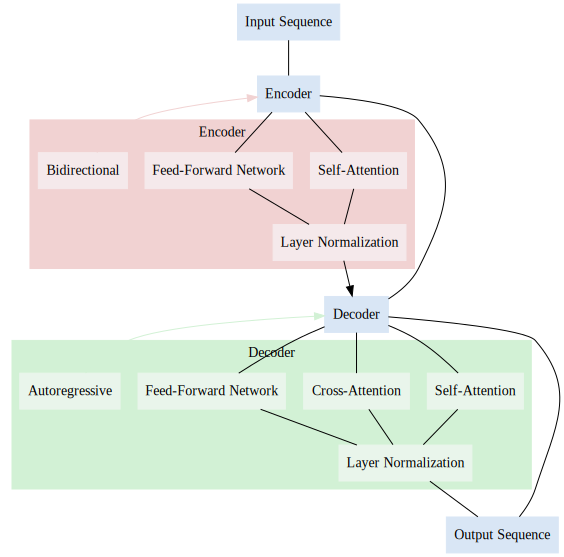

In [1]:
from IPython.display import SVG, display

# Load the SVG file and display it
svg_file = '/kaggle/input/notebook-images/BART.svg'
display(SVG(filename=svg_file))

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
   Importing modules
    </div>

In [2]:
import tensorflow as tf
from transformers import BartTokenizer, TFBartForSequenceClassification
import pandas as pd
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Reading the dataframe and checking out its columns    </div>

In [3]:
train_df = pd.read_csv('/kaggle/input/commonlitreadabilityprize/train.csv')


In [4]:
train_df.columns

Index(['id', 'url_legal', 'license', 'excerpt', 'target', 'standard_error'], dtype='object')

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Splitting the data into train and val sets    </div>

In [5]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_df['excerpt'].values, train_df['target'].values, test_size=0.2, random_state=42
)

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Loading the BART tokenizer    </div>

In [6]:
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Tokenizing the training and val texts    </div>

In [7]:
train_encodings = tokenizer.batch_encode_plus(
    train_texts.tolist(), truncation=True, padding=True, max_length=512
)
val_encodings = tokenizer.batch_encode_plus(
    val_texts.tolist(), truncation=True, padding=True, max_length=512
)

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Creating tensorflow dataset    </div>

In [8]:
# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Defining model and compiling it    </div>

In [9]:
model = TFBartForSequenceClassification.from_pretrained('facebook/bart-large', num_labels=1)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=2e-5),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_squared_error'])


All model checkpoint layers were used when initializing TFBartForSequenceClassification.

Some layers of TFBartForSequenceClassification were not initialized from the model checkpoint at facebook/bart-large and are newly initialized: ['classification_head']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Training the model    </div>

In [23]:
model.fit(
    train_dataset.shuffle(1000).batch(4),
    validation_data=val_dataset.batch(4),
    epochs=1,
)

567/567 [==============================] - 433s 764ms/step - loss: 1.2492 - mean_squared_error: 1.2492 - val_loss: 1.0605 - val_mean_squared_error: 1.0605


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Loading the test data    </div>

In [24]:
test_df = pd.read_csv('/kaggle/input/commonlitreadabilityprize/test.csv')

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Tokenising test texts    </div>

In [25]:
test_encodings = tokenizer.batch_encode_plus(
    test_df['excerpt'].tolist(), truncation=True, padding=True, max_length=512
)

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Creating test dataset    </div>

In [26]:
test_dataset = tf.data.Dataset.from_tensor_slices(dict(test_encodings))


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Predicting on test dataset    </div>

In [27]:
predictions = model.predict(test_dataset.batch(4))


2/2 [==============================] - 0s 173ms/step


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Preparing submission    </div>

In [28]:
submission = pd.DataFrame({'id': test_df['id'], 'target': predictions['logits'].flatten()})
submission.to_csv('submission.csv', index=False)
